In [2]:
import numpy as np
import utilities
import corner
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Define R and h in terms of us and g
def Rfunc(ux,uy,g):
    return 2*ux*uy/g
def hfunc(uy,g):
    return uy*uy/(2.*g)

In [51]:
#Define our frequentist probability distribution
def P_freq(ux,uy,g,means,sigmas):
    R0,h0,g0 = means
    sigR,sigh,sigg = sigmas
    Rexp = np.exp(-(Rfunc(ux,uy,g)-R0)**2/(2*sigR**2))
    hexp = np.exp(-(hfunc(uy,g)-h0)**2/(2*sigh**2))
    gexp = np.exp(-(g-g0)**2/(2*sigg**2))
    return 2*uy**2/(g*(2*np.pi)**(3./2.)*sigh*sigR*sigg)*Rexp*hexp*gexp

def P_freq_ux(uy,g,ux,means,sigmas):
    return P_freq(ux,uy,g,means,sigmas)
def P_freq_uy(ux,g,uy,means,sigmas):
    return P_freq(ux,uy,g,means,sigmas)
def P_freq_g(ux,uy,g,means,sigmas):
    return P_freq(ux,uy,g,means,sigmas)
print P_freq(12,4.5,9.8,means,sigmas)


0.000282326689098


In [30]:
#Define our bayesian probability distribution function without priors
def P_bay(ux,uy,g,means,sigmas):
    R0,h0,g0 = means
    sigR,sigh,sigg = sigmas
    Rexp = np.exp(-(Rfunc(ux,uy,g)-R0)**2/(2*sigR**2))
    hexp = np.exp(-(hfunc(uy,g)-h0)**2/(2*sigh**2))
    gexp = np.exp(-(g-g0)**2/(2*sigg**2))
    return 1./((2*np.pi)**(3./2.)*sigh*sigR*sigg)*Rexp*hexp*gexp
def ln_P_bay(ux,uy,g,means,sigmas):
    R0,h0,g0 = means
    sigR,sigh,sigg = sigmas
    Rpart = -(Rfunc(ux,uy,g)-R0)**2/(2*sigR**2)
    hpart = -(hfunc(uy,g)-h0)**2/(2*sigh**2)
    gpart = -(g-g0)**2/(2*sigg**2)
    return np.log(1./((2*np.pi)**(3./2.)*sigh*sigR*sigg))+Rpart+hpart+gpart


In [61]:
#Let's marginalize over P_bay twice to calculate the marginalized
#probability of each of the parameters in turn. In order to do this
#We will first define wrappers for P_bay to be able to integrate with
#scipy.dblquad, which uses a high order technique from Fortran's QUADPACK.
#This is necessary because quad always integrates over the first argument
#These functions are used to marginalize over the first two variables
meanR, sigmaR = 10.0, 0.2
meanh, sigmah = 1.0, 0.2
meang, sigmag = 9.81, 0.05
means = [meanR,meanh,meang]
sigmas = [sigmaR,sigmah,sigmag]

def P_bay_ux(uy,g,ux,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)
def P_bay_uy(ux,g,uy,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)
def P_bay_g(ux,uy,g,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)
print P_bay(12,4.5,10,means,sigmas)

#And a version with log priors
def P_bay_ux_lp(uy,g,ux,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)/ux
def P_bay_uy_lp(ux,g,uy,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)/uy
def P_bay_g_lp(ux,uy,g,means,sigmas):
    return P_bay(ux,uy,g,means,sigmas)/g

7.77839432379e-06


In [43]:
#Do the double integrals
# Set the means and standard deviations for R, g, and h
from scipy import integrate
meanR, sigmaR = 10.0, 0.2
meanh, sigmah = 1.0, 0.2
meang, sigmag = 9.81, 0.05
means = [meanR,meanh,meang]
sigmas = [sigmaR,sigmah,sigmag]

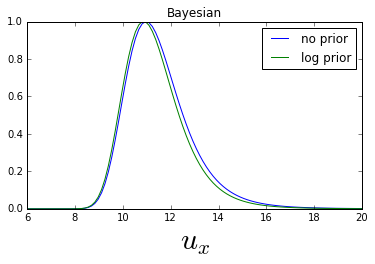

In [73]:
#Do the integrals for P(ux) first
uxes = np.linspace(6.,20.,100)
Pux = np.zeros_like(uxes)
for i in range(len(uxes)):
    Pux[i] = integrate.nquad(P_bay_ux,[[2,6],[9.6,10.]],args=(uxes[i],means,sigmas))[0]
Ppux = np.zeros_like(uxes)
for i in range(len(uxes)):
    Ppux[i] = integrate.nquad(P_bay_ux_lp,[[2,6],[9.6,10.]],args=(uxes[i],means,sigmas))[0]

plt.plot(uxes,Pux/max(Pux),label = "no prior")
plt.plot(uxes,Ppux/max(Ppux),label="log prior")
plt.legend()
plt.title("Bayesian")
plt.xlabel(r"$u_x$",fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.savefig("ux_bayesian.pdf")

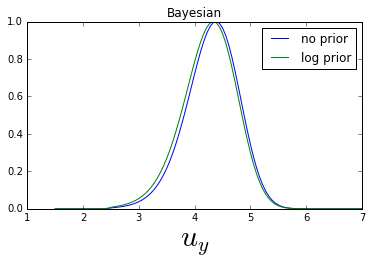

In [71]:
#Do the integrals for P(uy) next
uyes = np.linspace(1.5,7.,100)
Puy = np.zeros_like(uyes)
for i in range(len(uyes)):
    Puy[i] = integrate.nquad(P_bay_uy,[[7,20],[9.6,10.]],args=(uyes[i],means,sigmas))[0]
Ppuy = np.zeros_like(uxes)
for i in range(len(uyes)):
    Ppuy[i] = integrate.nquad(P_bay_uy_lp,[[7,20],[9.6,10.]],args=(uyes[i],means,sigmas))[0]

plt.plot(uyes,Puy/max(Puy),label = "no prior")
plt.plot(uyes,Ppuy/max(Ppuy),label="log prior")
plt.legend()
plt.title("Bayesian")
plt.xlabel(r"$u_y$",fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.savefig("uy_bayesian.pdf")

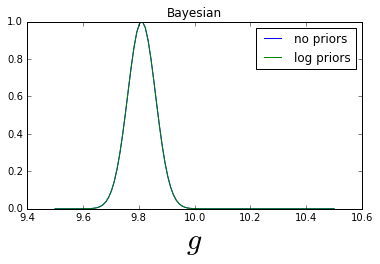

In [72]:
#Do the integrals for P(g) next
gs = np.linspace(9.5,10.5,100)
Pg = np.zeros_like(gs)
for i in range(len(gs)):
    Pg[i] = integrate.nquad(P_bay_g,[[7,20],[2,6]],args=(gs[i],means,sigmas))[0]
Ppg = np.zeros_like(gs)
for i in range(len(gs)):
    Ppg[i] = integrate.nquad(P_bay_g_lp,[[7,20],[2,6]],args=(gs[i],means,sigmas))[0]

plt.plot(gs,Pg/max(Pg),label="no priors")
plt.plot(gs,Ppg/max(Ppg),label = "log priors")
plt.legend()
plt.title("Bayesian")
plt.xlabel(r"$g$",fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.savefig("g_bayesian.pdf")